# Î≥¥ÌóòÎ£åÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏

Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏ÏóêÎäî 1,338ÌñâÏùò ÎØ∏Íµ≠Ïùò Î≥¥Ìóò Îç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎ©∞ Î≥¥Ìóò ÏöîÍ∏àÏùÄ Î≥¥Ìóò Í∞ÄÏûÖÏûêÏùò Ïó∞Î†π, ÏÑ±Î≥Ñ, BMI, ÏïÑÎèô Ïàò, Ìù°Ïó∞Ïûê Î∞è ÏßÄÏó≠ ÏÜçÏÑ±Ïóê Îî∞Îùº Ï†úÍ≥µÎêúÎã§.

ÏÜçÏÑ±ÏùÄ Ïà´ÏûêÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÌòºÌï©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Í≤∞Ï∏°ÏπòÎäî Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§.

> https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

| Î≥ÄÏàò | ÏùòÎØ∏ | Í∏∞ÌÉÄ |
|---|---|---|
| age | ÏàòÏùµÏûêÏùò Ïó∞Î†π | ÏàòÏπòÌòï |
| sex | Í≥ÑÏïΩÏûêÏùò ÏÑ±Î≥Ñ | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(female/male) |
| bmi | ÎØ∏ÎßåÎèÑ. Î™∏Î¨¥Í≤åÎ•º ÌÇ§Ïùò Ï†úÍ≥±ÏúºÎ°ú ÎÇòÎàà Í∞í. | ÏàòÏπòÌòï<br/>Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9 |
| children | ÏùòÎ£åÎ≥¥ÌóòÏù¥ Ï†ÅÏö©ÎêòÎäî ÏûêÎÖÄ Ïàò | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |
| smoker | Ìù°Ïó∞ Ïó¨Î∂Ä | Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(yes/no) |
| region | Í±∞Ï£ºÏßÄÏó≠ | Î≤îÏ£ºÌòï<br/>(Î∂ÅÎèô: northeast, ÎÇ®Îèô: southeast / ÎÇ®ÏÑú: southwest / Î∂ÅÏÑú: northwest) |
| charges | ÏùòÎ£åÎπÑ | ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ |

## #01. Ï§ÄÎπÑÏûëÏóÖ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

In [1]:
%%time

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *

from sklearn.preprocessing import PolynomialFeatures
from pandas import DataFrame, merge

CPU times: total: 15.6 ms
Wall time: 2.2 s


### [2] Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [2]:
%%time
categories = ["sex", "smoker", "region"]
origin = my_read_excel("https://data.hossam.kr/mldata/us_health_insurance.xlsx", categories=categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB
None

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ
+----+-------+--------+--------+------------+----------+-----------+-----------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |
|----+-------+--------+--------+------------+----------+-----------+-----------|
|  0 |    19 | female |   27.9 |          0 | yes      | southwest |   16884.9 |
|  1 |    18 | male   |  33.77 |          1 | no       | southeast |   1725.55 |
|  2 |    28 | male   | 

> Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ age, bmi, childrenÏùÄ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Í∞Ä ÏÉÅÏù¥ÌïòÎØÄÎ°ú Ïä§ÏºÄÏùºÎßÅÏùÑ ÏàòÌñâÌï¥Ïïº ÌïúÎã§. 
>
> Î™ÖÎ™©Ìòï Î≥ÄÏàòÎäî Ìù°Ïó∞ Ïó¨Î∂ÄÎ•º Ï†úÏô∏ÌïòÍ≥†Îäî ÎåÄÏ≤¥Î°ú Îç∞Ïù¥ÌÑ∞Í∞Ä Í∑†ÌòïÏû°ÌòÄ ÏûàÎã§. Î™ÖÎ™©ÌòïÏóê ÎåÄÌïú ÌäπÎ≥ÑÌïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Îäî Î∂àÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
>
> ÏùòÎ£åÎπÑÏßÄÏ∂ú Î≥ÄÏàòÏùò ÌÜµÍ≥ÑÍ∞íÏùÑ ÏÇ¥Ìé¥Î≥¥Î©¥ Ï§ëÏïôÍ∞íÏù¥ `$9,382`Ïù¥Í≥†, ÌèâÍ∑†Ïù¥ `$13,270`Ïù∏ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ïó¨Í∏∞ÏÑú Ìï¥Îãπ Î≥ÄÏàòÏùò ÌèâÍ∑†Í∞íÏù¥ Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏùòÎ£åÎπÑ Î∂ÑÌè¨Îäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Íº¨Î¶¨Í∞Ä Í∏¥ Î∂ÑÌè¨Î•º ÏßÄÎãê Í≤ÉÏù¥Îã§.

## #02. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### [1] Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨

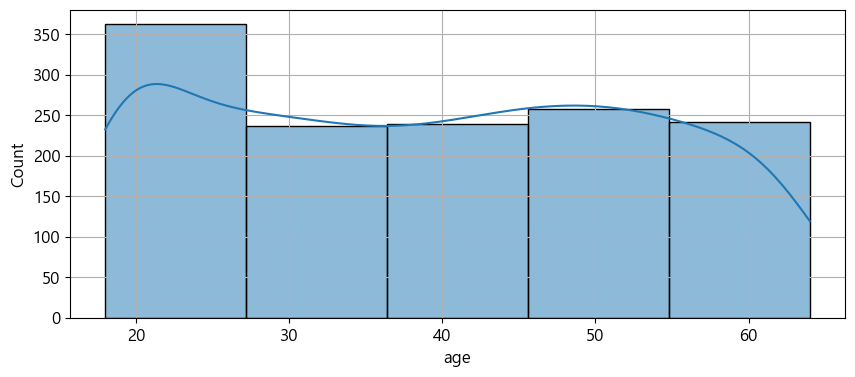

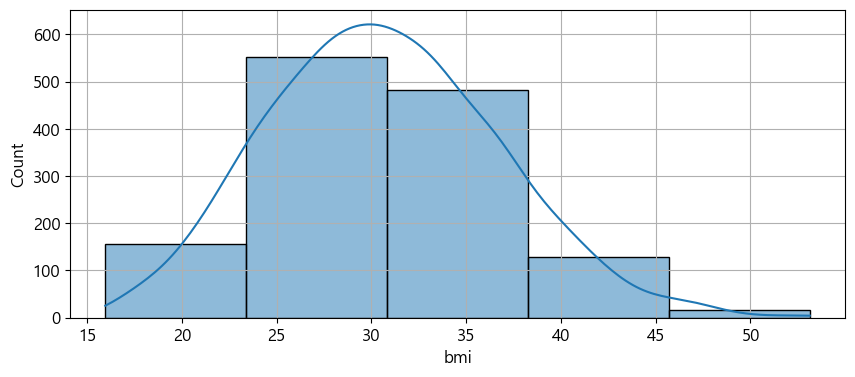

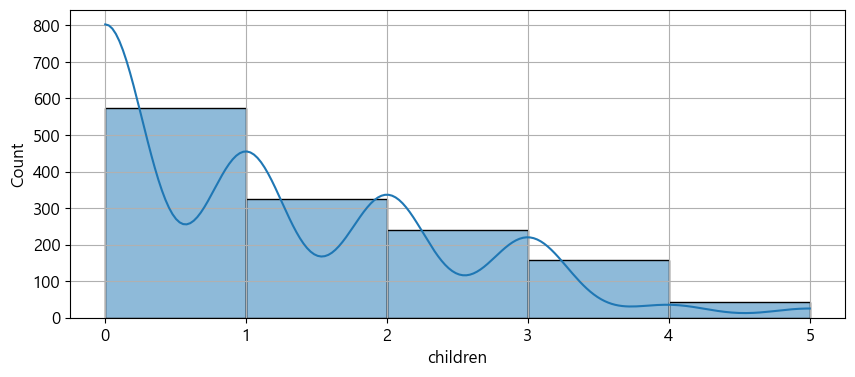

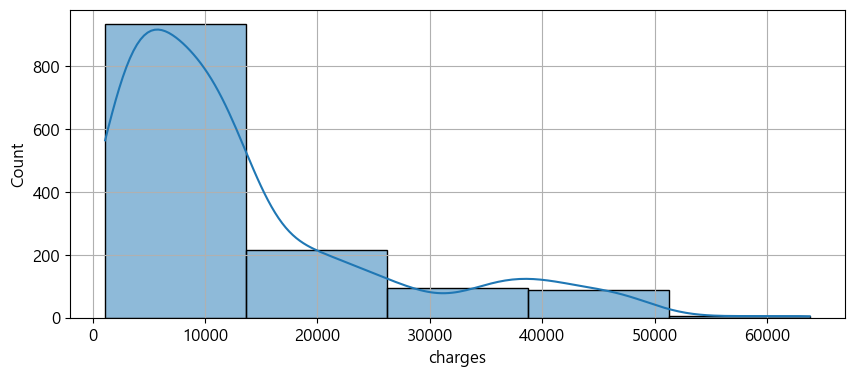

In [3]:
for c in ['age', 'bmi', 'children', 'charges']:
    my_histplot(origin, c, bins=5, dpi=100)

> ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÇ¨ÎûåÎì§ÏùÄ Ïó∞Í∞Ñ $15,000 Ïù¥ÌïòÏùò ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.
> 
> ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú bmiÏßÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥Î©¥ Í≥ºÏ≤¥Ï§ëÏù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

### [2] Í∞Å Î≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥Ñ ÌååÏïÖ

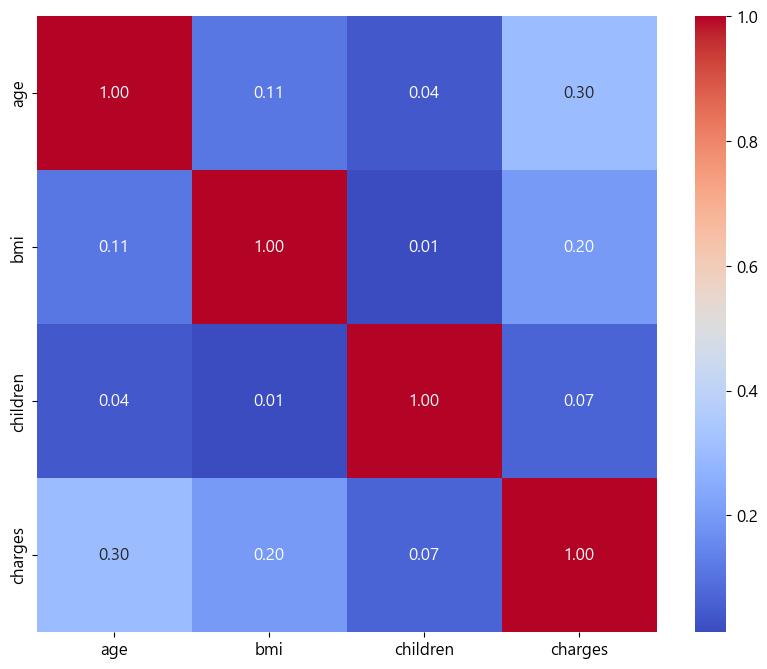

+-------------------------+---------------+-------------+----------+
|                         |   correlation |     p-value | result   |
|-------------------------+---------------+-------------+----------|
| ('age', 'bmi')          |      0.109272 | 6.19429e-05 | True     |
| ('age', 'children')     |      0.042469 |    0.120493 | False    |
| ('age', 'charges')      |      0.299008 | 4.88669e-29 | True     |
| ('bmi', 'age')          |      0.109272 | 6.19429e-05 | True     |
| ('bmi', 'children')     |     0.0127589 |     0.64101 | False    |
| ('bmi', 'charges')      |      0.198341 | 2.45909e-13 | True     |
| ('children', 'age')     |      0.042469 |    0.120493 | False    |
| ('children', 'bmi')     |     0.0127589 |     0.64101 | False    |
| ('children', 'charges') |     0.0679982 |   0.0128521 | True     |
| ('charges', 'age')      |      0.299008 | 4.88669e-29 | True     |
| ('charges', 'bmi')      |      0.198341 | 2.45909e-13 | True     |
| ('charges', 'children') |     0.

In [4]:
my_correlation(origin[['age', 'bmi', 'children', 'charges']], dpi=100)

> Ïó∞Î†π, bmiÏßÄÏàò, Î∂ÄÏñëÍ∞ÄÏ°± Ïàò, ÏùòÎ£åÎπÑÏßÄÏ∂úÏùÄ ÏïΩÌïòÏßÄÎßå Î™®Îëê Ïñë(+)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Í≥† ÏûàÎã§.
>
> ÏòàÎ•º Îì§Ïñ¥, Ïó∞Î†πÍ≥º bmiÏßÄÏàòÎäî ÎÇòÏù¥Í∞Ä Îì§Ïñ¥Í∞à ÏàòÎ°ù Î™∏Î¨¥Í≤åÍ∞Ä Ï¶ùÍ∞ÄÎêòÎ©¥ÏÑú bmi ÏßÄÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•ÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÍ≥†, Î∂ÄÏñëÍ∞ÄÏ°± ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏù¥ ÎßéÏïÑÏßÑÎã§Í≥† Î≥¥Îäî Í≤ÉÎèÑ Ìï©Î¶¨Ï†ÅÏù∏ ÌåêÎã®Ïù¥ Îê† Ïàò ÏûàÎã§.

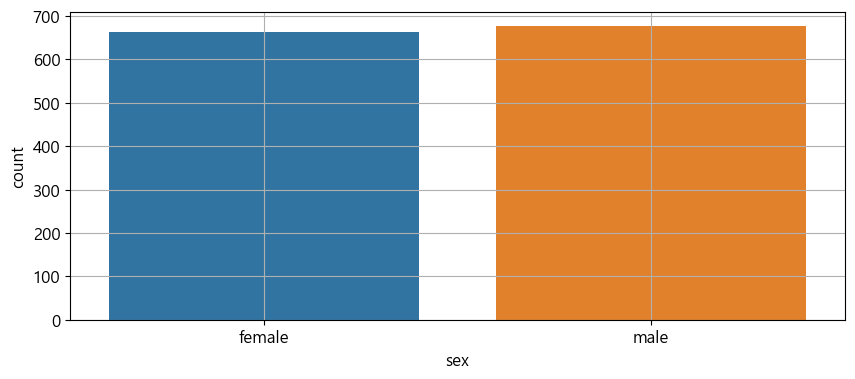

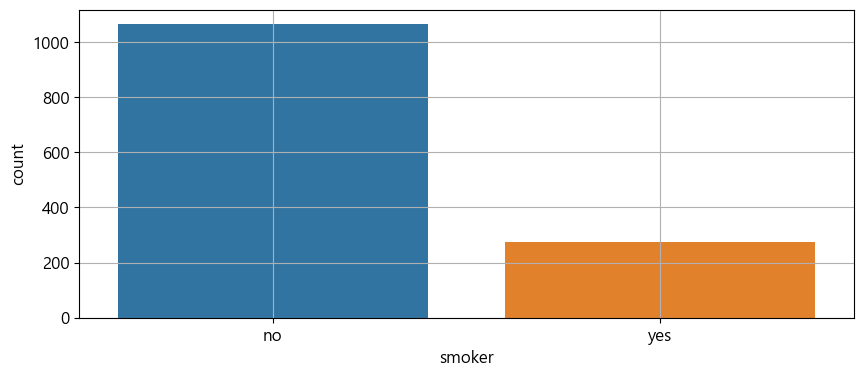

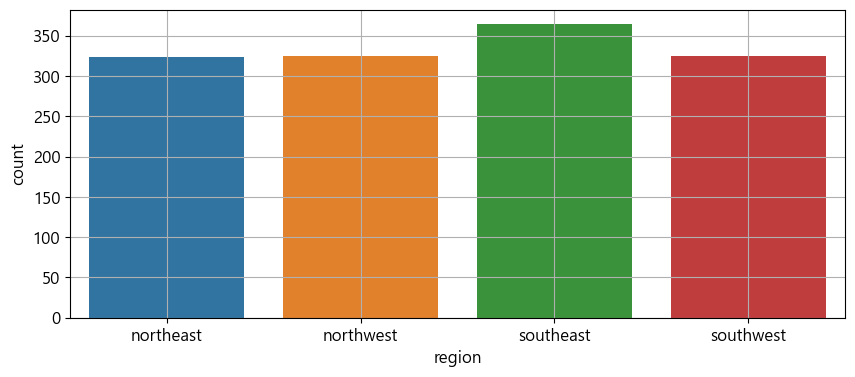

In [5]:
for c in categories:
    my_countplot(origin, c, dpi=100)

> Ìù°Ïó∞ Ïó¨Î∂ÄÏùò Í≤ΩÏö∞ ÎπÑÌù°Ïó∞ÏûêÍ∞Ä ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎã§.
> 
> Í∑∏ Î∞ñÏóê ÏÑ±Î≥ÑÍ≥º ÏßÄÏó≠Ïùò Í≤ΩÏö∞ ÎπÑÏä∑ÌïòÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î∂ÑÏÇ∞Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌÜµÏ†úÏöîÏù∏ÏúºÎ°ú ÎÑ£Îäî Í≤ÉÏùÑ Í≥†Î†§Ìï¥ Î≥º Ïàò ÏûàÍ≤†Îã§.

### [3] Î∂ÑÏÇ∞Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌÜµÏ†úÏöîÏù∏ ÏÑ†Ï†ï

In [7]:
from my_helper.analysis import my_anova

for c in categories:
    tmp = origin[[c, 'charges']]
    my_anova(tmp, hue=c, target='charges')

pingouin.anova
+----+----------+-------------+------+------------+--------+-----------+------------+
|    | Source   |          SS |   DF |         MS |      F |     p-unc |        np2 |
|----+----------+-------------+------+------------+--------+-----------+------------|
|  0 | sex      |  6.4359e+08 |    1 | 6.4359e+08 | 4.3997 | 0.0361327 | 0.00328238 |
|  1 | Within   | 1.95431e+11 | 1336 | 1.4628e+08 |    nan |       nan |        nan |
+----+----------+-------------+------+------------+--------+-----------+------------+

statsmodels.anova.anova_lm
+----------+------+-------------+------------+--------+-----------+
|          |   df |      sum_sq |    mean_sq |      F |    PR(>F) |
|----------+------+-------------+------------+--------+-----------|
| C(sex)   |    1 |  6.4359e+08 | 6.4359e+08 | 4.3997 | 0.0361327 |
| Residual | 1336 | 1.95431e+11 | 1.4628e+08 |    nan |       nan |
+----------+------+-------------+------------+--------+-----------+
[anova_lm] statistic: 4.400, p-va

In [8]:
tmp = origin[["sex", "smoker", "region", "charges"]]
my_anova(tmp, target="charges", hue=["sex", "smoker", "region"])

pingouin.anova
+----+-----------------------+-------------+------+-------------+------------+--------------+-------------+
|    | Source                |          SS |   DF |          MS |          F |        p-unc |         np2 |
|----+-----------------------+-------------+------+-------------+------------+--------------+-------------|
|  0 | sex                   | 4.99724e+06 |    1 | 4.99724e+06 |  0.0910793 |     0.762857 | 6.88903e-05 |
|  1 | smoker                | 1.19401e+11 |    1 | 1.19401e+11 |    2176.19 | 1.25108e-281 |    0.622091 |
|  2 | region                | 1.05877e+08 |    3 | 3.52923e+07 |   0.643235 |     0.587268 |  0.00145756 |
|  3 | sex * smoker          | 4.10428e+08 |    1 | 4.10428e+08 |    7.48043 |   0.00632067 |  0.00562658 |
|  4 | sex * region          | 1.38228e+06 |    3 |      460760 | 0.00839778 |     0.998944 | 1.90566e-05 |
|  5 | smoker * region       | 1.32965e+09 |    3 | 4.43218e+08 |    8.07805 |  2.46961e-05 |   0.0180014 |
|  6 | sex * 

> ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞ Ïó¨Î∂ÄÏóê ÎåÄÌïú pÍ∞íÏù¥ Î™®Îëê 0.05 ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Îëê ÏöîÏù∏ÏùÄ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† Î≥º Ïàò ÏûàÎã§.
>
> ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞Îüâ, Ìù°Ïó∞ÎüâÍ≥º ÏßÄÏó≠ Í∞ÑÏóêÎäî ÍµêÌö®ÏûëÏö© Ìö®Í≥ºÍ∞Ä ÏûàÏùåÏù¥ Î∞úÍ≤¨ÎêòÏóàÎã§.

### [4] ÍµêÌö®ÏûëÏö©Ïóê ÎåÄÌïú ÏãúÍ∞ÅÌôî ÌôïÏù∏

#### (1) Ìù°Ïó∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏÑ±Î≥Ñ Î∂ÑÌè¨

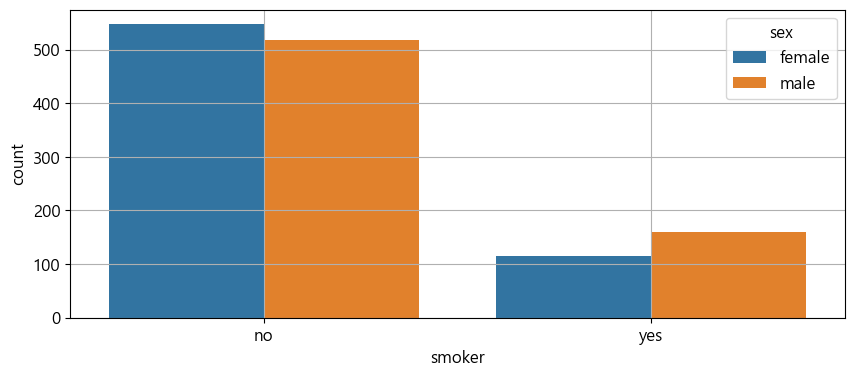

In [9]:
my_countplot(origin, xname="smoker", hue='sex', dpi=100)

#### (2) Ìù°Ïó∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏßÄÏó≠ Î∂ÑÌè¨

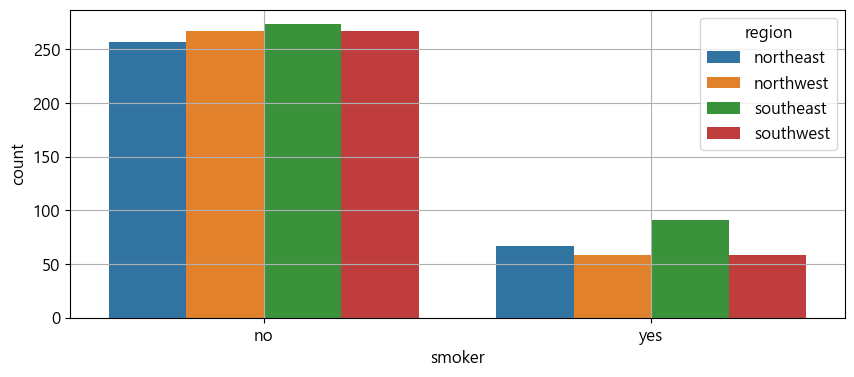

In [10]:
my_countplot(origin, xname="smoker", hue='region', dpi=100)

> ÎåÄÏ≤¥Î°ú ÎπÑÌù°Ïó∞ÏûêÏùò ÎπÑÏú®Ïù¥ ÎÜíÎã§.

## #03. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### [1] Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî 

In [11]:
std_df = my_standard_scaler(origin, yname="charges")
my_pretty_table(std_df.head())

+----+-----------+-----------+------------+--------+----------+-----------+-----------+
|    |       age |       bmi |   children | sex    | smoker   | region    |   charges |
|----+-----------+-----------+------------+--------+----------+-----------+-----------|
|  0 |  -1.43876 |  -0.45332 |  -0.908614 | female | yes      | southwest |   16884.9 |
|  1 |  -1.50997 |  0.509621 | -0.0787672 | male   | no       | southeast |   1725.55 |
|  2 | -0.797954 |  0.383307 |    1.58093 | male   | no       | southeast |   4449.46 |
|  3 | -0.441948 |  -1.30553 |  -0.908614 | male   | no       | northwest |   21984.5 |
|  4 | -0.513149 | -0.292556 |  -0.908614 | male   | no       | northwest |   3866.86 |
+----+-----------+-----------+------------+--------+----------+-----------+-----------+


### [2] ÎçîÎØ∏Î≥ÄÏàò ÏÉùÏÑ±

In [12]:
dummy_df = my_dummies(origin)
my_pretty_table(dummy_df.head())

+----+-------+--------+------------+-----------+------------+--------------+--------------------+--------------------+--------------------+
|    |   age |    bmi |   children |   charges |   sex_male |   smoker_yes |   region_northwest |   region_southeast |   region_southwest |
|----+-------+--------+------------+-----------+------------+--------------+--------------------+--------------------+--------------------|
|  0 |    19 |   27.9 |          0 |   16884.9 |          0 |            1 |                  0 |                  0 |                  1 |
|  1 |    18 |  33.77 |          1 |   1725.55 |          1 |            0 |                  0 |                  1 |                  0 |
|  2 |    28 |     33 |          3 |   4449.46 |          1 |            0 |                  0 |                  1 |                  0 |
|  3 |    33 | 22.705 |          0 |   21984.5 |          1 |            0 |                  1 |                  0 |                  0 |
|  4 |    32 |  28.8

### [4] ÌõàÎ†®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [13]:
x_train, x_test, y_train, y_test = my_train_test_split(dummy_df, "charges", test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

## #04. ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù

### [1] Ï†ÑÏ≤¥ Î≥ÄÏàòÏóê ÎåÄÌïú Î∂ÑÏÑù

In [15]:
my_linear_regression(x_train, y_train, x_test, y_test, cv=5, dpi=100, use_plot=False, resid_test=False)

[ÍµêÏ∞®Í≤ÄÏ¶ù]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.732513 |
+----+-------------------+

[ÌöåÍ∑ÄÏãù]
charges = 255.647 * age + 342.676 * bmi + 451.587 * children + -83.442 * sex_male + 23501.011 * smoker_yes + -419.220 * region_northwest + -1033.274 * region_southeast + -1026.348 * region_southwest + -11830.463

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| Îç∞Ïù¥ÌÑ∞ |       0.800174 |              4013.1 |         3.05524e+07 |          5527.43 |                    

LinearRegression(n_jobs=-1)

### [2] bmiÎ•º Ï†úÏô∏Ìïú ÏÉÅÌÉúÎ°ú Î∂ÑÏÑù

In [16]:
ignore = ['bmi']
x_train2 = x_train.drop(ignore, axis=1)
x_test2 = x_test.drop(ignore, axis=1)

my_linear_regression(x_train2, y_train, x_test2, y_test, cv=5, dpi=100, use_plot=False, resid_test=False)

[ÍµêÏ∞®Í≤ÄÏ¶ù]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.706778 |
+----+-------------------+

[ÌöåÍ∑ÄÏãù]
charges = 270.725 * age + 474.541 * children + 149.559 * sex_male + 23369.090 * smoker_yes + -399.319 * region_northwest + 383.019 * region_southeast + -722.646 * region_southwest + -2504.752

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| Îç∞Ïù¥ÌÑ∞ |       0.773724 |              3931.3 |         3.45966e+07 |          5881.89 |                         32.8914 |      

LinearRegression(n_jobs=-1)

### [3] childrenÏùÑ Ï†úÏô∏Ìïú ÌõÑ Î∂ÑÏÑù

In [17]:
ignore = ['bmi', 'children']
x_train2 = x_train.drop(ignore, axis=1)
x_test2 = x_test.drop(ignore, axis=1)

my_linear_regression(x_train2, y_train, x_test2, y_test, cv=5, dpi=100, use_plot=False, resid_test=False)

[ÍµêÏ∞®Í≤ÄÏ¶ù]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.704795 |
+----+-------------------+

[ÌöåÍ∑ÄÏãù]
charges = 272.778 * age + 199.381 * sex_male + 23370.460 * smoker_yes + -343.994 * region_northwest + 392.585 * region_southeast + -650.862 * region_southwest + -2130.177

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| Îç∞Ïù¥ÌÑ∞ |       0.770795 |             3970.02 |         3.50444e+07 |          5919.83 |                         34.6503 |               -22.007 |
+-

LinearRegression(n_jobs=-1)

> ÎåÄÎ∂ÄÎ∂ÑÏùò Î≥ÄÏàòÍ∞Ä ÏÜåÍ±∞ÎêòÏñ¥ ÌõàÎ†® Î™®Îç∏Ïùò Ïã†Î¢∞ÎèÑÍ∞Ä ÏÉÅÎãπÌûà ÎÇÆÎã§. Îã§Î•∏ Î≥ÄÏàòÎì§ÏùÑ Ï∂îÍ∞ÄÎ°ú Ìà¨ÏûÖÌï¥Ïïº Ìï† Í≤É Í∞ôÎã§.

## #05. ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù 2Ï∞®Ï†Ñ

ÎèÑÎ©îÏù∏ ÏßÄÏãùÏù¥ÎûÄ ÌäπÏ†ï Î∂ÑÏïºÏùò Ï†ÑÎ¨∏ÌôîÎêú ÏßÄÏãù.(=ÎÖ∏ÌïòÏö∞)

ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ ÌôúÏö©ÌïòÎ©¥ ÎèÑÏ∂úÎêú Î∂ÑÏÑùÎ™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞úÏÑ†Ìï† Ïàò ÏûàÎã§.

### [1] ÏùòÎ£åÎπÑ ÏßÄÏ∂ú

ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê ÎåÄÌïú Ïó∞Î†πÏùò ÏòÅÌñ•ÏùÄ Ï†Ñ Ïó∞Î†πÏóê Í±∏Ï≥ê ÏùºÏ†ïÌïòÏßÄ ÏïäÎã§.

20,30ÎåÄÏôÄ 50,60,70ÎåÄ Í∞ÑÏùò ÏùòÎ£åÎπÑ ÏßÄÏ∂ú Ï∞®Ïù¥Îäî ÌÅ¨Í≤å ÎÇ† Ïàò Î∞ñÏóê ÏóÜÎã§.

Í∏∞Ï°¥Ïùò Ïó∞Î†πÎ≥ÄÏàòÎäî Ï†ÑÌòïÏ†ÅÏù∏ ÏÑ†ÌòïÌöåÍ∑Ä Î∞©Ï†ïÏãùÏùÑ Îî∞Î•∏Îã§.

$y = ax + b$

ÌïòÏßÄÎßå Í≥†Ïó∞Î†πÎåÄÏùºÏàòÎ°ù Ï¶ùÍ∞ÄÌè≠Ïù¥ Ïª§ÏßÄÎäî ÌòÑÏÉÅÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÎÜíÏùÄ Ï∞®ÏàòÏùò Ìï≠ÏùÑ ÌöåÍ∑Ä Î™®Îç∏Ïóê Ï∂îÍ∞ÄÌï¥ÏÑú Îã§Ìï≠ÏãùÏúºÎ°ú ÎßåÎì§Ïñ¥ Ï£ºÎ©¥ ÎêúÎã§.

$y = a^2x + ax + b$

#### (1) Ïó∞Î†πÎåÄÎ≥Ñ ÏùòÎ£åÎπÑ Ï¶ùÍ∞ÄÌè≠ ÌôïÏù∏

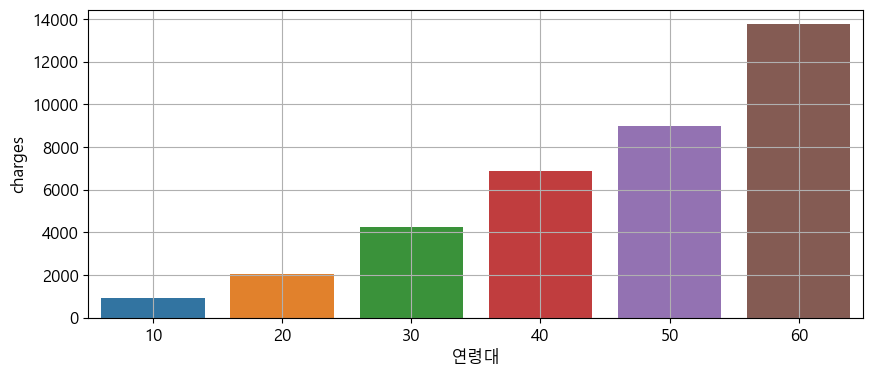

In [18]:
df = origin.copy()
df['Ïó∞Î†πÎåÄ'] = df['age'].apply(lambda x: int(x/10)*10)
mean_df = df.filter(['Ïó∞Î†πÎåÄ', 'charges']).groupby('Ïó∞Î†πÎåÄ', as_index=False).mean()
mean_df['charges'] = mean_df['charges'] - 7500

my_barplot(mean_df, xname='Ïó∞Î†πÎåÄ', yname='charges', dpi=100)

> Í≥†Ïó∞Î†πÎåÄÏùºÏàòÎ°ù Ï¶ùÍ∞ÄÌè≠Ïù¥ Ïª§ÏßÄÍ≥† ÏûàÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### (2) ÎÇòÏù¥Ïóê ÎåÄÌïú 2Ï∞®Ìï≠ Ï∂îÍ∞ÄÌïòÍ∏∞

#### ÏßÅÏ†ë Íµ¨ÌòÑÌïòÍ∏∞

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_fit = poly.fit_transform(origin[["age"]])
poly_df = DataFrame(poly_fit, columns=poly.get_feature_names_out(), index=origin.index)

my_pretty_table(poly_df.head())

+----+-------+---------+
|    |   age |   age^2 |
|----+-------+---------|
|  0 |    19 |     361 |
|  1 |    18 |     324 |
|  2 |    28 |     784 |
|  3 |    33 |    1089 |
|  4 |    32 |    1024 |
+----+-------+---------+


In [20]:
new_df = origin.copy()
new_df[poly_df.columns] = poly_df[poly_df.columns]

my_pretty_table(new_df.head())

+----+-------+--------+--------+------------+----------+-----------+-----------+---------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |   age^2 |
|----+-------+--------+--------+------------+----------+-----------+-----------+---------|
|  0 |    19 | female |   27.9 |          0 | yes      | southwest |   16884.9 |     361 |
|  1 |    18 | male   |  33.77 |          1 | no       | southeast |   1725.55 |     324 |
|  2 |    28 | male   |     33 |          3 | no       | southeast |   4449.46 |     784 |
|  3 |    33 | male   | 22.705 |          0 | no       | northwest |   21984.5 |    1089 |
|  4 |    32 | male   |  28.88 |          0 | no       | northwest |   3866.86 |    1024 |
+----+-------+--------+--------+------------+----------+-----------+-----------+---------+


#### Î™®ÎìàÌôî Í∏∞Îä• ÌôúÏö©

In [21]:
new_df = my_poly_features(origin, columns=['age'])
my_pretty_table(new_df.head())

+----+-------+--------+--------+------------+----------+-----------+-----------+---------+
|    |   age | sex    |    bmi |   children | smoker   | region    |   charges |   age^2 |
|----+-------+--------+--------+------------+----------+-----------+-----------+---------|
|  0 |    19 | female |   27.9 |          0 | yes      | southwest |   16884.9 |     361 |
|  1 |    18 | male   |  33.77 |          1 | no       | southeast |   1725.55 |     324 |
|  2 |    28 | male   |     33 |          3 | no       | southeast |   4449.46 |     784 |
|  3 |    33 | male   | 22.705 |          0 | no       | northwest |   21984.5 |    1089 |
|  4 |    32 | male   |  28.88 |          0 | no       | northwest |   3866.86 |    1024 |
+----+-------+--------+--------+------------+----------+-----------+-----------+---------+


### [2] ÎπÑÎßåÎèÑ (BMI)

BMIÎäî ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑúÏùò ÏòÅÌñ•ÏùÄ Ï†ÅÏßÄÎßå Ïñ¥ÎäêÏ†ïÎèÑÏùò Íµ¨Í∞ÑÏùÑ ÎÑòÏñ¥Í∞ÄÎ©¥ Í∞ïÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.

#### (1) ÎπÑÎßåÎèÑÏóê Îî∞Î•∏ ÏùòÎ£åÎπÑ ÏßÄÏ∂ú Ï∞®Ïù¥ ÌôïÏù∏

In [22]:
new_df[['bmi', 'charges']]

bmi      charges
0     27.900  16884.92400
1     33.770   1725.55230
2     33.000   4449.46200
3     22.705  21984.47061
4     28.880   3866.85520
...      ...          ...
1333  30.970  10600.54830
1334  31.920   2205.98080
1335  36.850   1629.83350
1336  25.800   2007.94500
1337  29.070  29141.36030

[1338 rows x 2 columns]

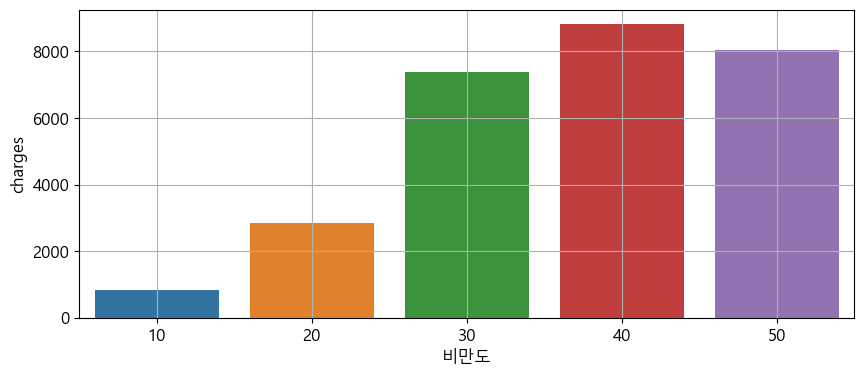

In [23]:
df = new_df.copy()
df['ÎπÑÎßåÎèÑ'] = df['bmi'].apply(lambda x: int(x/10)*10)
mean_df = df.filter(['ÎπÑÎßåÎèÑ', 'charges']).groupby('ÎπÑÎßåÎèÑ', as_index=False).mean()
mean_df['charges'] = mean_df['charges'] - 8000

my_barplot(mean_df, xname='ÎπÑÎßåÎèÑ', yname='charges', dpi=100)

> bmiÍ∞íÏùò Îã®ÏúÑÍ∞Ä 30 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞Ïùò ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏù¥ Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Î≥¥Îã§ Îçî ÌÅ¨Îã§.
>
> Ïù¥ ÎÇ¥Ïö©ÏùÑ ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï∂îÍ∞ÄÌï† Ïàò ÏûàÎã§.

#### ÎπÑÎßåÍ≥º Ï†ïÏÉÅ Ï≤¥Ï§ëÏóê ÎåÄÌïú ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä

In [24]:
new_df['obesity'] = new_df['bmi'] >= 30
new_df['obesity'] = new_df['obesity'].astype('int')
new_df

age     sex     bmi  children smoker     region      charges   age^2  \
0     19.0  female  27.900         0    yes  southwest  16884.92400   361.0   
1     18.0    male  33.770         1     no  southeast   1725.55230   324.0   
2     28.0    male  33.000         3     no  southeast   4449.46200   784.0   
3     33.0    male  22.705         0     no  northwest  21984.47061  1089.0   
4     32.0    male  28.880         0     no  northwest   3866.85520  1024.0   
...    ...     ...     ...       ...    ...        ...          ...     ...   
1333  50.0    male  30.970         3     no  northwest  10600.54830  2500.0   
1334  18.0  female  31.920         0     no  northeast   2205.98080   324.0   
1335  18.0  female  36.850         0     no  southeast   1629.83350   324.0   
1336  21.0  female  25.800         0     no  southwest   2007.94500   441.0   
1337  61.0  female  29.070         0    yes  northwest  29141.36030  3721.0   

      obesity  
0           0  
1           1  
2           1  
3           0  
4           0  
...       ...  
1333        1  
1334        1  
1335        1  
1336        0  
1337        0  

[1338 rows x 9 columns]

## #05. ÌååÏÉùÎ≥ÄÏàòÍ∞Ä Ï∂îÍ∞ÄÎêú ÏÉÅÌÉúÏóêÏÑúÏùò ÌöåÍ∑ÄÎ∂ÑÏÑù

ÎÇòÏù¥Ïóê ÎåÄÌïú 2Ï∞®Ìï≠Ïù¥ Ï∂îÍ∞ÄÎêòÏóàÏúºÎØÄÎ°ú Îã§Ìï≠ÏÑ†ÌòïÌöåÍ∑ÄÏóê Ìï¥ÎãπÌïúÎã§.

### [1] ÎçîÎØ∏Î≥ÄÏàò ÏÉùÏÑ±

In [25]:
df1 = my_dummies(new_df, "sex", "smoker", "region")
my_pretty_table(df1.head())

+----+-------+--------+------------+-----------+---------+-----------+------------+--------------+--------------------+--------------------+--------------------+
|    |   age |    bmi |   children |   charges |   age^2 |   obesity |   sex_male |   smoker_yes |   region_northwest |   region_southeast |   region_southwest |
|----+-------+--------+------------+-----------+---------+-----------+------------+--------------+--------------------+--------------------+--------------------|
|  0 |    19 |   27.9 |          0 |   16884.9 |     361 |         0 |          0 |            1 |                  0 |                  0 |                  1 |
|  1 |    18 |  33.77 |          1 |   1725.55 |     324 |         1 |          1 |            0 |                  0 |                  1 |                  0 |
|  2 |    28 |     33 |          3 |   4449.46 |     784 |         1 |          1 |            0 |                  0 |                  1 |                  0 |
|  3 |    33 | 22.705 |     

### [2] Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî

ÎçîÎØ∏Î≥ÄÏàòÎäî ÌëúÏ§ÄÌôî ÎåÄÏÉÅÏù¥ ÏïÑÎãàÎã§.

In [26]:
df2 = my_standard_scaler(df1[['age', 'bmi', 'children', 'charges', 'age^2']], 'charges')
my_pretty_table(df2.head())

+----+-----------+-----------+------------+-----------+-----------+
|    |       age |       bmi |   children |     age^2 |   charges |
|----+-----------+-----------+------------+-----------+-----------|
|  0 |  -1.43876 |  -0.45332 |  -0.908614 |  -1.22046 |   16884.9 |
|  1 |  -1.50997 |  0.509621 | -0.0787672 |  -1.25334 |   1725.55 |
|  2 | -0.797954 |  0.383307 |    1.58093 | -0.844579 |   4449.46 |
|  3 | -0.441948 |  -1.30553 |  -0.908614 | -0.573551 |   21984.5 |
|  4 | -0.513149 | -0.292556 |  -0.908614 | -0.631311 |   3866.86 |
+----+-----------+-----------+------------+-----------+-----------+


In [28]:
df3 = df1.copy()
df3[df2.columns] = df2[df2.columns]
my_pretty_table(df3.head())

+----+-----------+-----------+------------+-----------+-----------+-----------+------------+--------------+--------------------+--------------------+--------------------+
|    |       age |       bmi |   children |   charges |     age^2 |   obesity |   sex_male |   smoker_yes |   region_northwest |   region_southeast |   region_southwest |
|----+-----------+-----------+------------+-----------+-----------+-----------+------------+--------------+--------------------+--------------------+--------------------|
|  0 |  -1.43876 |  -0.45332 |  -0.908614 |   16884.9 |  -1.22046 |         0 |          0 |            1 |                  0 |                  0 |                  1 |
|  1 |  -1.50997 |  0.509621 | -0.0787672 |   1725.55 |  -1.25334 |         1 |          1 |            0 |                  0 |                  1 |                  0 |
|  2 | -0.797954 |  0.383307 |    1.58093 |   4449.46 | -0.844579 |         1 |          1 |            0 |                  0 |                 

### [3] ÌõàÎ†®, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [29]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, 'charges', test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 10), (268, 10), (1070,), (268,))

### [4] Îã§Ìï≠ÏÑ†ÌòïÌöåÍ∑Ä

[ÌöåÍ∑ÄÏãù]
charges = 720.652 * children + 3672.413 * age^2 + 4167.078 * obesity + 23495.641 * smoker_yes + 6312.680

[ÌöåÍ∑ÄÎ∂ÑÏÑù ÏÑ±Îä•ÌèâÍ∞Ä]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| Îç∞Ïù¥ÌÑ∞ |       0.803823 |             4019.21 |         2.99946e+07 |          5476.73 |                         42.6912 |              -22.1698 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥ºÎ≥¥Í≥†]
+----+------------+------------+---

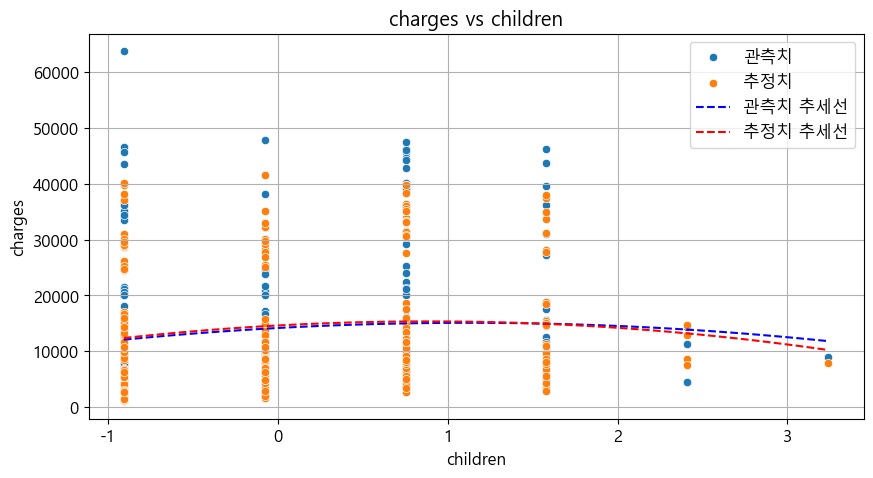

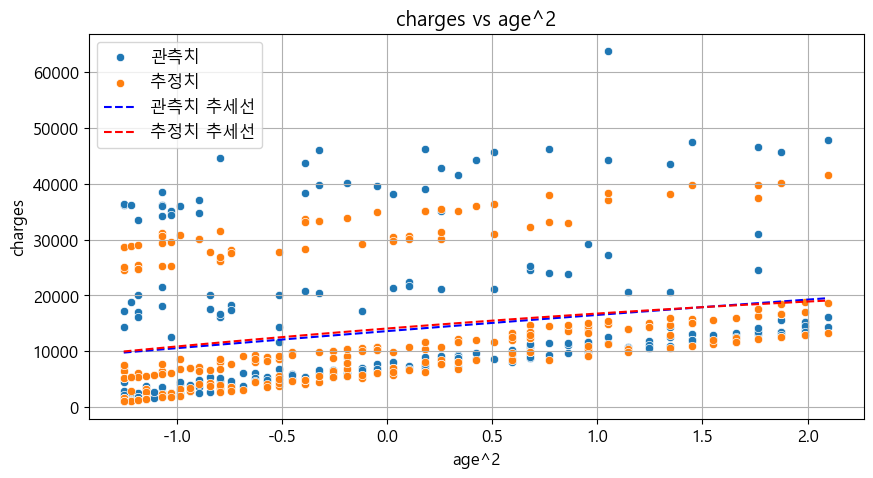

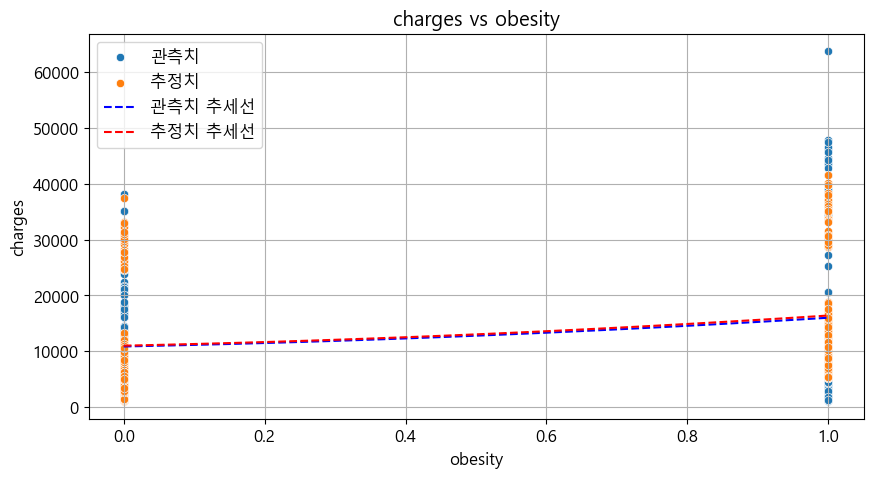

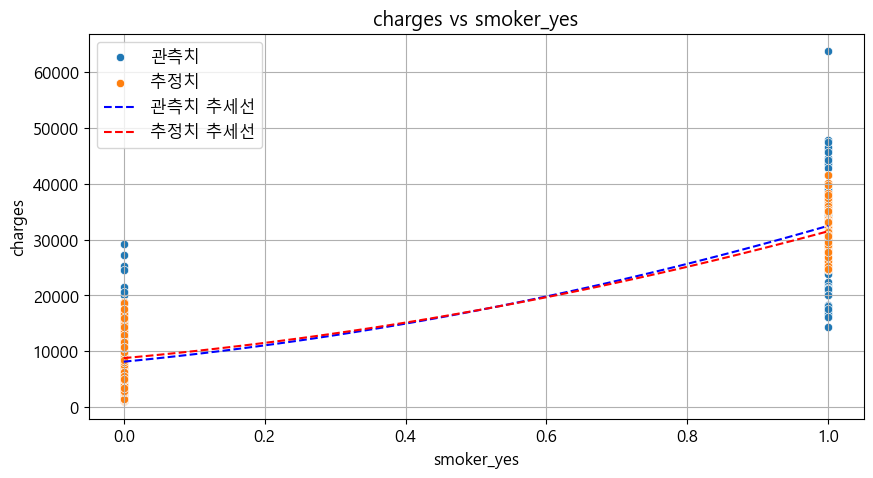

In [32]:
ignore = ['age', 'bmi', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male']
x_train2 = x_train.drop(ignore, axis=1)
x_test2 = x_test.drop(ignore, axis=1)
fit = my_linear_regression(x_train2, y_train, x_test2, y_test, degree=2, dpi=100)

In [33]:
import joblib
joblib.dump(fit, './model.pkl')

['./model.pkl']